In [5]:
y=[i*i for i in x]

In [8]:
x=[1,2,3,4,5]

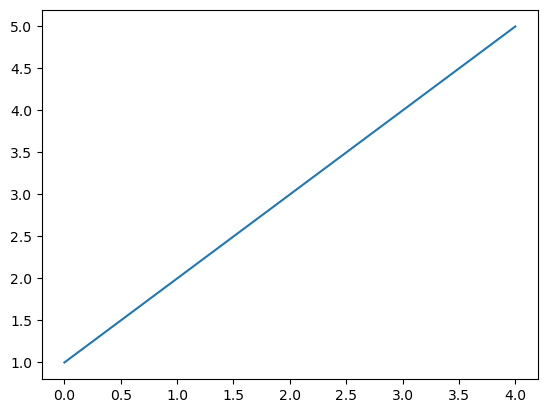

In [11]:
plt.plot(x)

In [10]:
import matplotlib.pyplot as plt

In [12]:
import requests
from io import StringIO
import pandas as pd
import numpy as np

def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '})
                                        for i in r.text.split('\n')
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    return ret
     

import datetime
import time

data = {}
n_days = 9
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break

    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)

parsing 2023-07-27 11:21:54.551045
fail! check the date is holiday
parsing 2023-07-26 11:21:54.551045
success!
parsing 2023-07-25 11:21:54.551045
success!
parsing 2023-07-24 11:21:54.551045
success!
parsing 2023-07-23 11:21:54.551045
fail! check the date is holiday
parsing 2023-07-22 11:21:54.551045
fail! check the date is holiday
parsing 2023-07-21 11:21:54.551045
success!
parsing 2023-07-20 11:21:54.551045
success!
parsing 2023-07-19 11:21:54.551045
success!
parsing 2023-07-18 11:21:54.551045
success!
parsing 2023-07-17 11:21:54.551045
success!
parsing 2023-07-16 11:21:54.551045
fail! check the date is holiday
parsing 2023-07-15 11:21:54.551045
fail! check the date is holiday
parsing 2023-07-14 11:21:54.551045
success!


In [13]:
close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
close.index = pd.to_datetime(close.index)
close

證券代號,1101,1101B,1102,1103,1104,1108,1109,1110,1201,1203,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-07-26,37.25,--,40.10,21.35,28.45,17.05,17.05,20.10,19.50,42.20,...,28.95,196.50,48.15,143.00,85.50,20.90,35.35,13.90,24.25,164.00
2023-07-25,37.40,48.05,39.00,21.30,29.60,16.85,17.10,19.70,19.55,43.30,...,28.35,194.50,48.25,142.00,85.10,20.85,35.05,13.80,23.35,164.50
2023-07-24,36.50,--,38.20,20.95,27.10,16.45,17.05,19.50,19.55,41.95,...,28.35,212.50,50.00,141.00,86.00,20.85,35.15,13.75,23.25,158.50
2023-07-21,36.10,48.10,39.15,21.20,28.10,16.60,17.30,19.65,19.65,42.90,...,28.50,216.00,50.00,144.00,88.70,21.25,35.20,13.80,23.80,149.50
2023-07-20,36.55,48.05,40.50,21.30,31.20,16.55,17.30,19.35,19.70,43.10,...,28.40,218.50,50.10,143.50,89.30,21.20,35.70,13.80,24.30,147.50
2023-07-19,36.60,48.15,44.80,21.15,30.75,16.20,17.20,19.65,19.55,43.00,...,28.40,215.50,50.10,144.50,88.20,21.05,35.10,13.55,23.40,142.50
2023-07-18,37.10,48.15,43.80,21.35,31.05,16.20,17.20,19.60,19.50,41.55,...,28.30,217.00,50.00,146.50,90.30,21.10,35.25,13.50,23.10,141.50
2023-07-17,36.75,48.10,43.90,21.40,31.15,16.50,17.30,19.55,19.80,41.45,...,29.15,218.50,50.20,149.00,91.30,21.50,35.45,13.70,23.30,149.00
2023-07-14,37.00,48.00,43.90,21.25,30.55,16.55,17.30,19.35,19.80,41.20,...,29.50,215.00,50.20,151.50,92.10,21.20,35.55,13.85,23.50,144.00


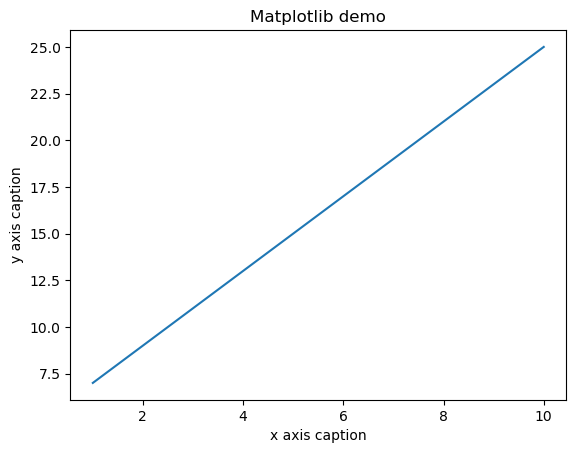

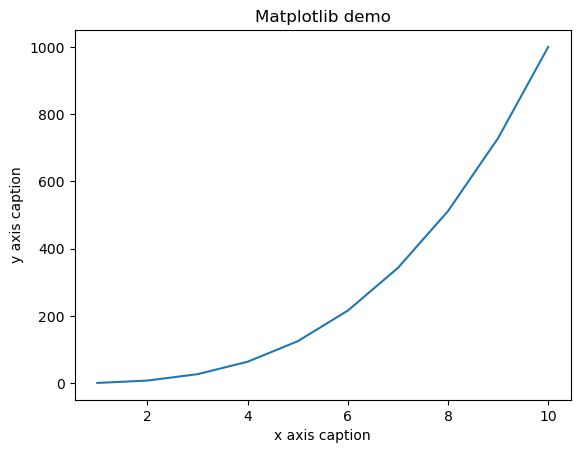

In [15]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1,11)
y = 2 * x + 5
plt.title("Matplotlib demo")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.plot(x,y)
plt.show()
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1,11)
y = x*x*x
plt.title("Matplotlib demo")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.plot(x,y)
plt.show()

In [16]:
import pandas as pd

In [17]:
series=pd.Series(y)

<AxesSubplot:>

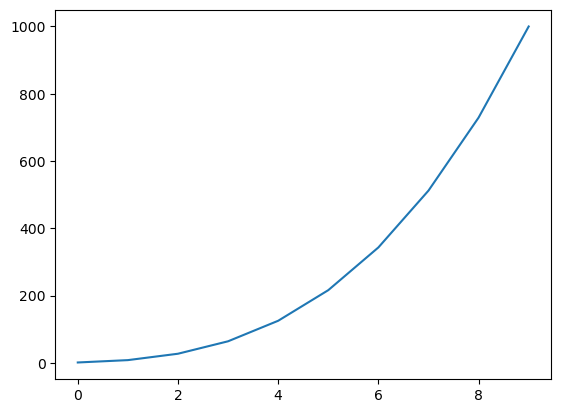

In [18]:
series.plot()